In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r'C:\Software\Data\Gaurav Certificates\PGD - Data Science Notes\Machine Learning\Clustering Assignments\Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Coverted the exports, health and imports columns in to actual values

df['exports'] = round(df['exports'] * df['gdpp']/100,2)
df['health'] = round(df['health'] * df['gdpp']/100,2)
df['imports'] = round(df['imports'] * df['gdpp']/100,2)

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


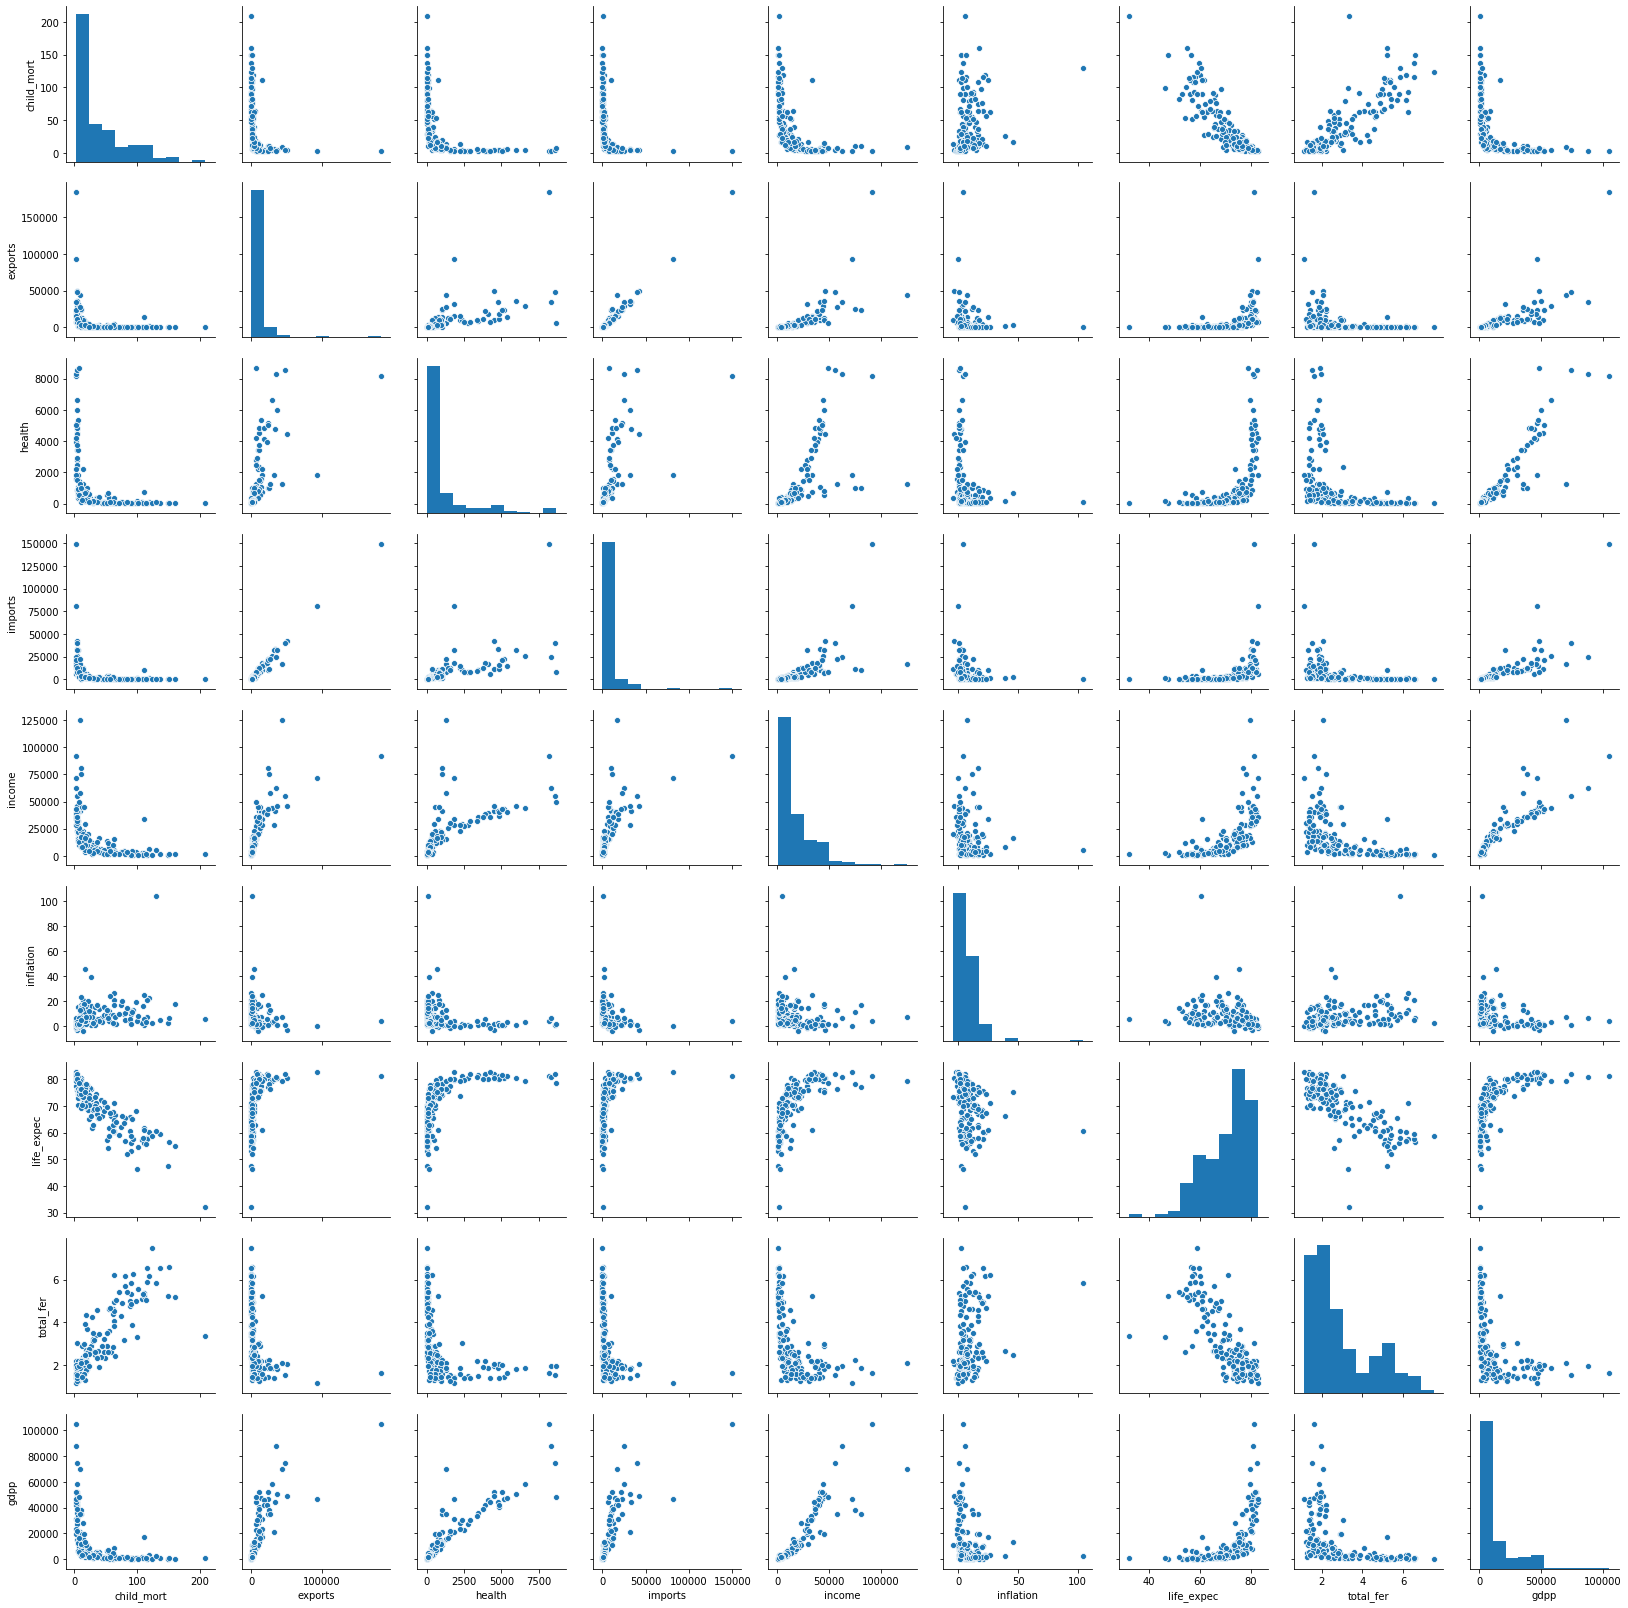

In [4]:
# visualising a numerical veriables

sns.pairplot(df)
plt.show()

# EDA

In [5]:
df.isnull().sum(axis=0)

# there is no null values in the data set

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
df.shape

(167, 10)

In [7]:
df.info

<bound method DataFrame.info of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2    55.30   41.92   248.30    1610   
1                Albania        16.6  1145.20  267.90  1987.74    9930   
2                Algeria        27.3  1712.64  185.98  1400.44   12900   
3                 Angola       119.0  2199.19  100.60  1514.37    5900   
4    Antigua and Barbuda        10.3  5551.00  735.66  7185.80   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2  1384.02  155.93  1565.19    2950   
163            Venezuela        17.1  3847.50  662.85  2376.00   16500   
164              Vietnam        23.3   943.20   89.60  1050.62    4490   
165                Yemen        56.3   393.00   67.86   450.64    4480   
166               Zambia        83.1   540.20   85.99   451.14    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2      

In [8]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618862,1056.733174,6588.352096,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885789,1801.408921,14710.810423,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.080000,12.820000,0.650000,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535000,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.890000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [9]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [10]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

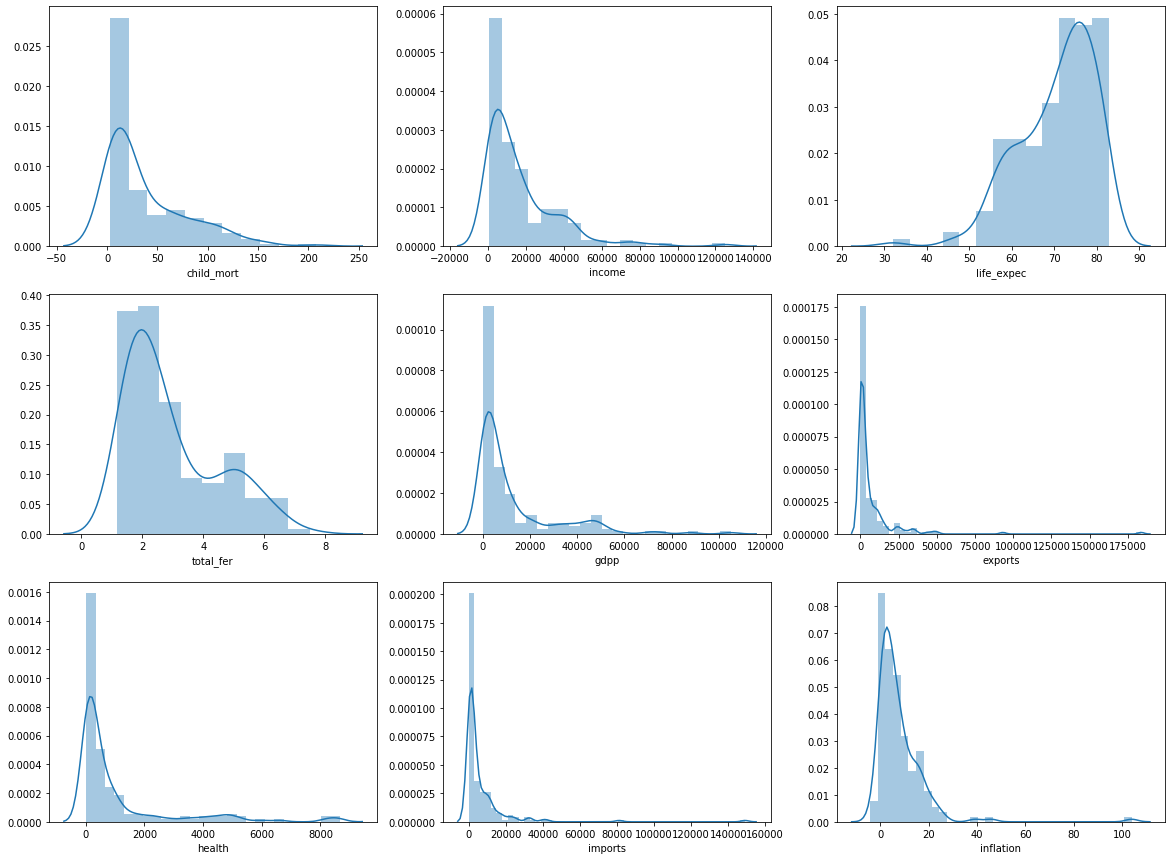

In [11]:
plt.figure(figsize = (20,15))
features = ['child_mort', 'income', 'life_expec', 'total_fer', 'gdpp', 'exports', 'health', 'imports', 'inflation']
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

- gdpp, health, imports and exports have highly correlation

# Outlier Treatment

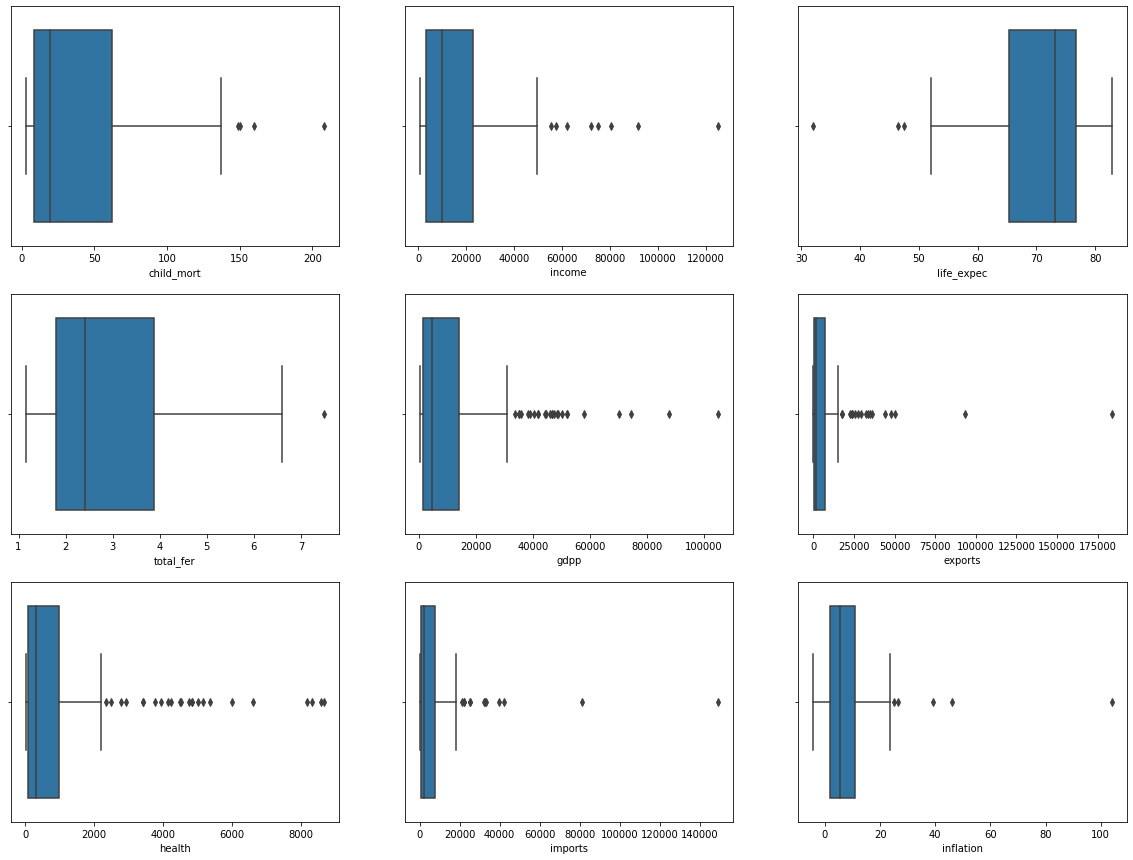

In [12]:
plt.figure(figsize = (20,15))
features = ['child_mort', 'income', 'life_expec', 'total_fer', 'gdpp', 'exports', 'health', 'imports', 'inflation']
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])

- gdpp, exports, health and income has more outliers as compare to other variables

In [13]:
# Capping
# 1-99: Soft range capping
# 5-95: Mid range capping
# 25-75: hard range capping

q4 = df['income'].quantile(0.95)
df['income'][df['income']>=q4] = q4
q4 = df['gdpp'].quantile(0.95)
df['gdpp'][df['gdpp']>=q4] = q4

# Child_Mort have also outliers in the upper range but if we will cap it we might will get wrong output 

# Clustering

In [14]:
#Calculating the Hopkins statistic

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [15]:
hopkins(df.drop('country',axis = 1))

0.9421071620136053

In [16]:
df1 = df.drop ('country', axis = 1)

In [17]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df1)

In [18]:
df.columns[:-1]

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer'],
      dtype='object')

In [19]:
df1

array([[ 1.29153238, -0.4110113 , -0.56503842, ..., -1.61909203,
         1.90288227, -0.75736169],
       [-0.5389489 , -0.35019096, -0.43921488, ...,  0.64786643,
        -0.85997281, -0.52332107],
       [-0.27283273, -0.31852577, -0.48482717, ...,  0.67042323,
        -0.0384044 , -0.49883845],
       ...,
       [-0.37231541, -0.36146329, -0.53849064, ...,  0.28695762,
        -0.66120626, -0.70727157],
       [ 0.44841668, -0.39216643, -0.55059527, ..., -0.34463279,
         1.14094382, -0.70727157],
       [ 1.11495062, -0.38395214, -0.54050066, ..., -2.09278484,
         1.6246091 , -0.69734618]])

In [20]:
df1 = pd.DataFrame(df1)
df1.columns = df.columns[:-1]
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,1.291532,-0.411011,-0.565038,-0.432275,-0.958349,0.157336,-1.619092,1.902882,-0.757362
1,-0.538949,-0.350191,-0.439215,-0.313677,-0.394006,-0.312347,0.647866,-0.859973,-0.523321
2,-0.272833,-0.318526,-0.484827,-0.353720,-0.192552,0.789274,0.670423,-0.038404,-0.498838
3,2.007808,-0.291375,-0.532366,-0.345953,-0.667360,1.387054,-1.179234,2.128151,-0.560376
4,-0.695634,-0.104331,-0.178771,0.040735,0.227992,-0.601749,0.704258,-0.541946,0.013312


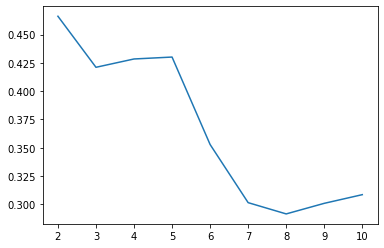

In [21]:
# Let's find out the value of K
# Silhouette Score
# Elbow Curve

from sklearn.metrics import silhouette_score
ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmeans.labels_)])

plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

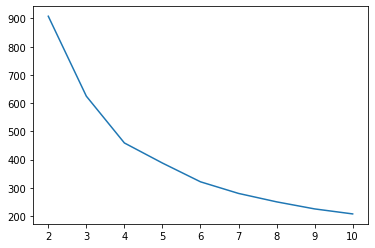

In [22]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

In [23]:
# K=3
kmean = KMeans(n_clusters = 3, random_state = 101)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [24]:
label = pd.DataFrame(kmean.labels_, columns = ['label'])

In [25]:
df.kmean = df.copy()

In [26]:
df.kmean = pd.concat([df.kmean, label ], axis =1)

In [27]:
df.kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200,0


In [28]:
# How many datapoints we have in each cluster
df.kmean.label.value_counts()

0    88
2    48
1    31
Name: label, dtype: int64

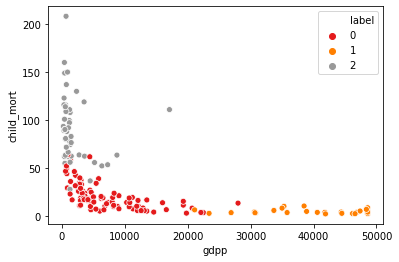

In [29]:
# Plot
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'label', data = df.kmean, palette = 'Set1')

- 0 label countries have Average & Low Gdpp and Low Child_Mort - these countries will require average focus
- 1 label countries have High Gdpp and Low Child_Mort - these countries is in very good condition
- 2 label countries have Low Gdpp and High Child_Mort - these countries will require more focus

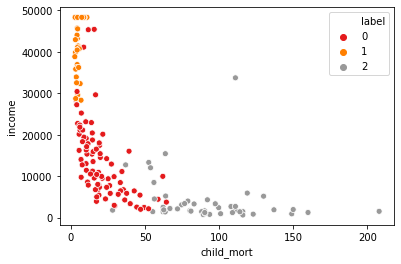

In [30]:
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'label', data = df.kmean, palette = 'Set1')

- 0 label countries have Low Child_Mort and High & Average Income - these countries will require average focus but we are getting a constant income from these countries
- 1 label countries have Low Child_Mort and Very High Income - these countries is in very good condition
- 2 label countries have High Child_Mort and Low Income - these countries will require more focus

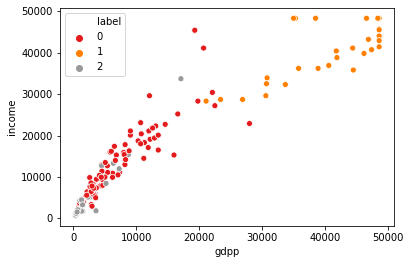

In [31]:
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'label', data = df.kmean, palette = 'Set1')

- 0 label countries have Average Income and Low Gdpp - these countries will require average focus
- 1 label countries have Very High Income and High Gdpp - these countries is in very good condition
- 2 label countries have Low Income and Low Gdpp - these countries will require more focus

In [32]:
# Cluster Profiling: GDP, CHILD MORT, INCOME

df.kmean.drop('country',axis = 1).groupby('label').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
label,,,,,,,,,
0,20.918182,3366.778409,482.897614,3461.435455,13455.568182,7.295045,73.222727,2.242159,7332.636364
1,4.935484,29057.154839,4144.128710,24385.519355,40555.161290,2.769903,80.506452,1.786452,40867.419355
2,91.610417,879.063542,114.822083,827.028750,3897.354167,11.911146,59.239583,4.992083,1909.208333


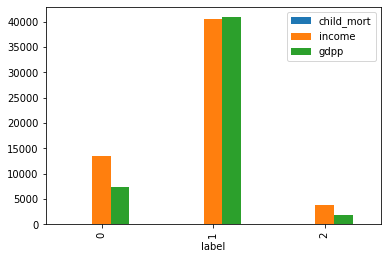

In [33]:
df.kmean.drop(['country', 'life_expec', 'total_fer', 'exports', 'health', 'imports', 'inflation'],axis = 1).groupby('label').mean().plot(kind = 'bar')

- Child_Mort have very low values as compare to other 02 variables
- Income & Gdpp is Very High values in 01 label

In [54]:
# will try to identiy that cluster which is having high Child_mort, low income and low GDP

In [35]:
# Once the cluster has been indentified: Filter the data for that clster

df.kmean[df.kmean['label'] ==1]['country']

7                 Australia
8                   Austria
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
123                   Qatar
133               Singapore
135                Slovenia
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United States
Name: country, dtype: object

In [36]:
df.kmean[df.kmean['label'] ==1].sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
98,Malta,6.8,32283.0,1825.15,32494.0,28300.0,3.830,80.3,1.36,21100,1
135,Slovenia,3.2,15046.2,2201.94,14718.6,28700.0,-0.987,79.5,1.57,23400,1
60,Greece,3.9,5944.9,2770.70,8258.3,28700.0,0.673,80.4,1.48,26900,1
74,Israel,4.6,10710.0,2334.78,10067.4,29600.0,1.770,81.4,3.03,30600,1
139,Spain,3.8,7828.5,2928.78,8227.6,32500.0,0.160,81.9,1.37,30700,1


- These top 5 countries need more focus and direst need of aid

# Hierarchical Clustering

In [37]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [38]:
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,1.291532,-0.411011,-0.565038,-0.432275,-0.958349,0.157336,-1.619092,1.902882,-0.757362
1,-0.538949,-0.350191,-0.439215,-0.313677,-0.394006,-0.312347,0.647866,-0.859973,-0.523321
2,-0.272833,-0.318526,-0.484827,-0.353720,-0.192552,0.789274,0.670423,-0.038404,-0.498838
3,2.007808,-0.291375,-0.532366,-0.345953,-0.667360,1.387054,-1.179234,2.128151,-0.560376
4,-0.695634,-0.104331,-0.178771,0.040735,0.227992,-0.601749,0.704258,-0.541946,0.013312


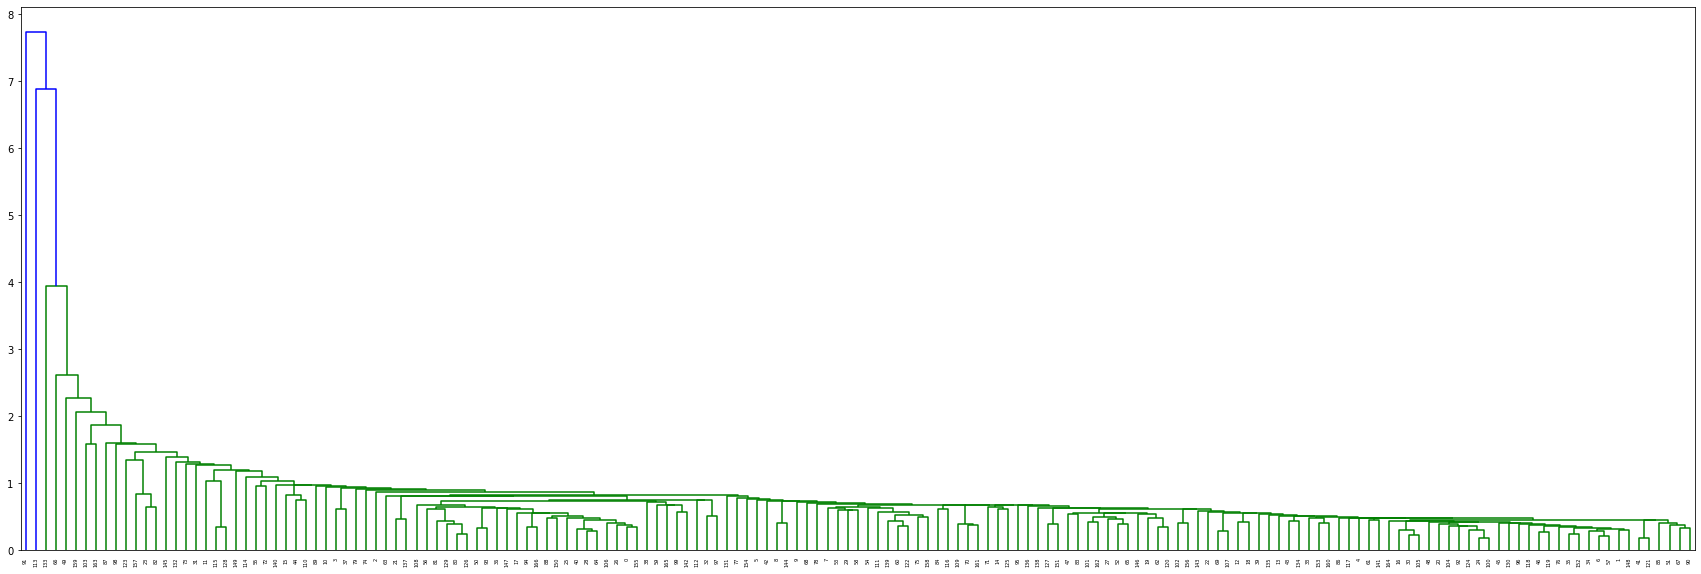

In [39]:
# single linkage

plt.figure(figsize = (30,10))
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

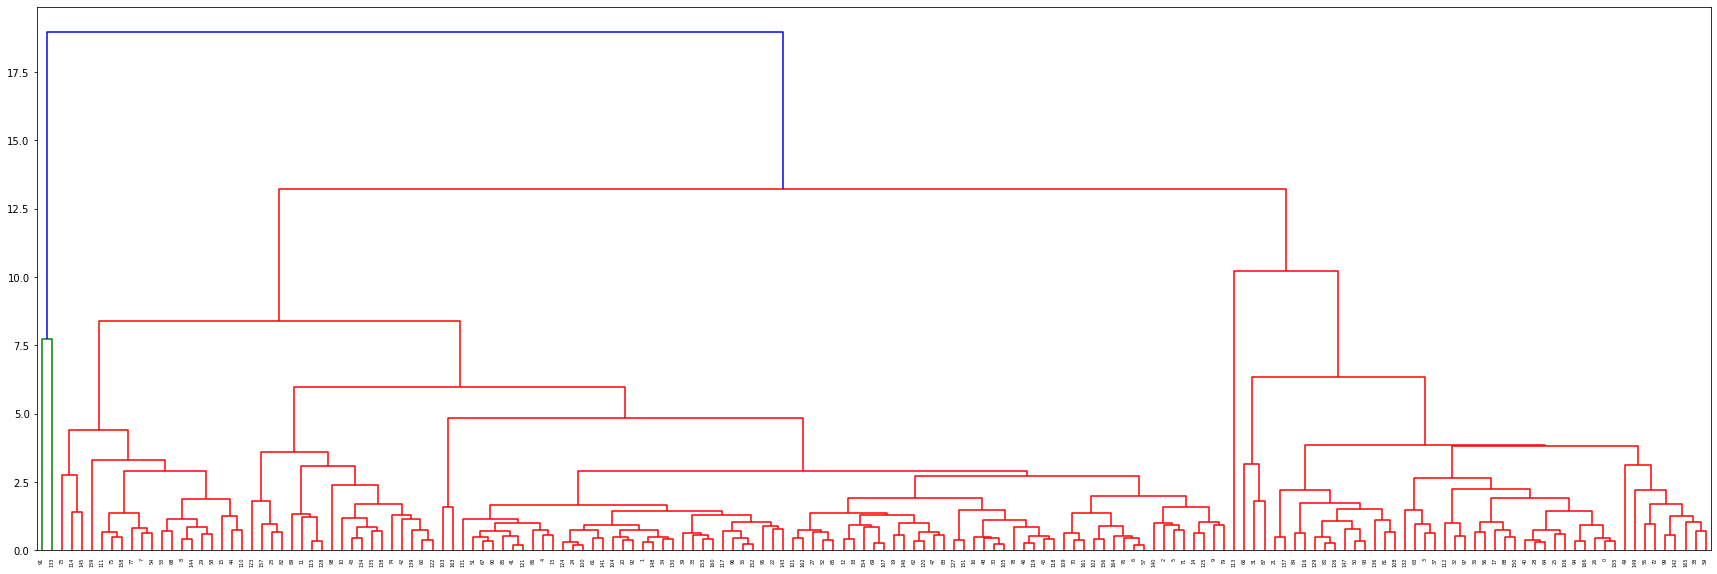

In [40]:
# complete linkage

plt.figure(figsize = (30,10))
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [41]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [42]:
# assign cluster labels
df.kmean['cluster_labels'] = cluster_labels
df.kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,cluster_labels
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200,0,1


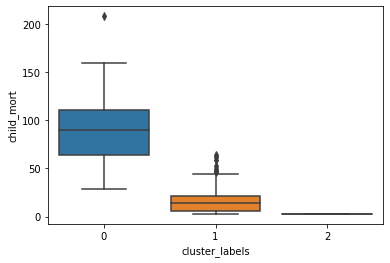

In [43]:
# plots
sns.boxplot(x='cluster_labels', y='child_mort', data=df.kmean)

- 0 label countries have Average & High Child_Mort - these countries will require more focus
- 1 label countries have Low Child_Mort - these countries is in good condition
- 2 label countries have Very Low Child_Mort - these countries is in very good condition

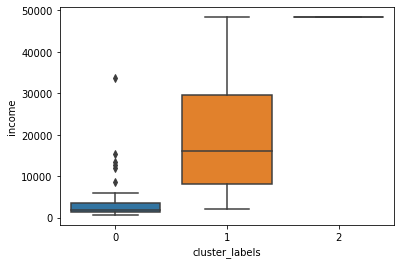

In [44]:
# plots
sns.boxplot(x='cluster_labels', y='income', data=df.kmean)

- 0 label countries have Very Low Income - these countries will require more focus
- 1 label countries have High Income - these countries is in good condition
- 2 label countries have Very High Income - these countries is in very good condition

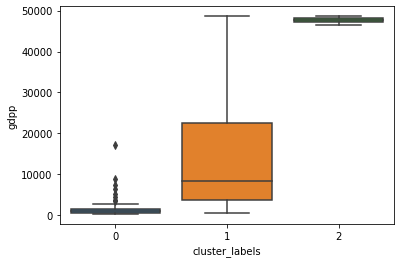

In [45]:
# plots
sns.boxplot(x='cluster_labels', y='gdpp', data=df.kmean)

- 0 label countries have Very Low Gdpp - these countries will require more focus
- 1 label countries have High Gdpp - these countries is in good condition
- 2 label countries have Very High Gdpp - these countries is in very good condition

In [47]:
# Cluster Profiling: GDP, CHILD MORT, INCOME

df.kmean.drop('country',axis = 1).groupby('cluster_labels').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
cluster_labels,,,,,,,,,,
0,91.610417,879.063542,114.822083,827.028750,3897.354167,11.911146,59.239583,4.992083,1909.208333,2.000000
1,16.993162,7864.088034,1375.718974,7097.208718,20040.341880,6.190231,75.002564,2.135983,15529.504274,0.247863
2,2.800000,138475.000000,5001.930000,115092.000000,48290.000000,1.787000,82.000000,1.390000,47605.000000,1.000000


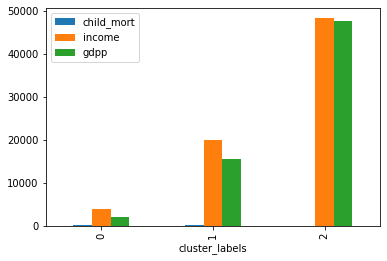

In [48]:
df.kmean.drop(['country', 'life_expec', 'total_fer', 'exports', 'health', 'imports', 'inflation', 'label'],axis = 1).groupby('cluster_labels').mean().plot(kind = 'bar')

- Child_Mort have very low values as compare to other 02 variables
- Income & Gdpp is Very High values in 02 label

In [51]:
# will try to identiy that cluster which is having high Child_mort, low income and low GDP

In [52]:
# Once the cluster has been indentified: Filter the data for that clster

df.kmean[df.kmean['cluster_labels'] ==1]['country']

1                  Albania
2                  Algeria
4      Antigua and Barbuda
5                Argentina
6                  Armenia
              ...         
160                Uruguay
161             Uzbekistan
162                Vanuatu
163              Venezuela
164                Vietnam
Name: country, Length: 117, dtype: object

In [53]:
df.kmean[df.kmean['cluster_labels'] ==1].sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,cluster_labels
109,Nepal,47.0,56.71,31.08,215.49,1990.0,15.10,68.3,2.61,592,0,1
146,Tajikistan,52.4,109.96,44.13,432.47,2110.0,12.50,69.6,3.51,738,0,1
12,Bangladesh,49.4,121.28,26.68,165.24,2440.0,7.14,70.4,2.33,758,0,1
27,Cambodia,44.4,425.23,44.64,467.67,2520.0,3.12,66.1,2.88,786,0,1
83,Kyrgyz Republic,29.6,454.08,54.38,718.96,2790.0,10.00,68.5,3.10,880,0,1


- These top 5 countries need more focus and direst need of aid

# End of the Assignment